In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
%pylab inline
import matplotlib.mlab as mlab
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
master = pd.read_csv('Data/master_updated.csv')
master = master.rename(columns={'Unnamed: 0':'District'})

In [34]:
master['HIVAIDS'].mean()

0.00014235678693564398

In [3]:
len(master)

75

In [4]:
master.columns

Index([u'District', u'Foreigner', u'Hill Brahman', u'Hill Chhetree',
       u'Hill Dalit', u'Madhesi Brahman/Chhetree', u'Madhesi Dalit',
       u'Madhesi Other - OC A', u'Madhesi Other - OC B',
       u'Mtn/Hill Janajati A', u'Mtn/Hill Janajati B', u'Musalman', u'Newar',
       u'Other (MPB)', u'Other undefined', u'Tarai Janajati',
       u'Total Pop Census', u'Poverty Gap', u'Poverty Incidence',
       u'Poverty Severity', u'Adult illiteracy rate',
       u'Deprivation in economic provisioning', u'HPI',
       u'People not expected to survive age 40',
       u'Children <5 years malnourished', u'Without safe water', u'BCG3',
       u'DPT-HepB 1 3', u'DPT-HepB 2 3', u'DPT-HepB 3 3',
       u'Japenese Encephalitis 3', u'Measles 12-23 3',
       u'Measles 9-11 months 3', u'Polio13', u'Polio23', u'Polio33', u'TT 1 3',
       u'TT 2+ 3', u'TT23', u'Sanitation Coverage (%',
       u'Water Coverage Supply (%)', u'HDI ',
       u'Sex Ratio (male per 100 female)', u'Confirmed Meningitis 3',
  

In [5]:
cols = master.columns.tolist()
#print(cols)
master = master.rename(columns={'TT 2+ 3':'TT2plus3', 'STD/STI3':'STD', 'HIV/AIDS3':'HIVAIDS'})
master.rename(columns=lambda x: x.replace(' ',''), inplace=True)
master.rename(columns=lambda x: x.replace('/',''), inplace=True)
master.rename(columns=lambda x: x.replace('(',''), inplace=True)
master.rename(columns=lambda x: x.replace(')',''), inplace=True)
master.rename(columns=lambda x: x.replace('-',''), inplace=True)
master.rename(columns=lambda x: x.replace('%',''), inplace=True)
master.rename(columns=lambda x: x.replace('+',''), inplace=True)
master.rename(columns=lambda x: x.replace('<',''), inplace=True)
master = master.drop('Peoplenotexpectedtosurviveage40',axis=1)
x = master.iloc[:,:41]
std = master['STD']
hiv = master['HIVAIDS']
hivstd = pd.concat([x, std, hiv], axis=1)

hivstd.head(2)

,District,Foreigner,HillBrahman,HillChhetree,HillDalit,MadhesiBrahmanChhetree,MadhesiDalit,MadhesiOtherOCA,MadhesiOtherOCB,MtnHillJanajatiA,...,Polio23,Polio33,TT13,TT2plus3,TT23,SanitationCoverage,WaterCoverageSupply,HDI,STD,HIVAIDS
0,Achham,0.0,0.102036,0.581749,0.135158,0.000101,0.000000,0.004921,0.0,0.006921,...,0.029579,0.029443,0.006622,0.016988,0.007410,19.08,88.01,0.378,0.002750,0.00336
1,Arghakhanchi,0.0,0.327665,0.193248,0.209020,0.001604,0.000066,0.001058,0.0,0.193349,...,0.023377,0.023797,0.006097,0.011162,0.011481,46.20,82.97,0.482,0.003334,0.00000


In [6]:
std2 = pd.concat([x, std], axis=1)
hiv2 = pd.concat([x, hiv], axis=1)

### random forest model for std
No parameter tuning

In [7]:
rfr = RandomForestRegressor(random_state=100,oob_score=True)
rfr.fit(std2.iloc[:,1:41], std2['STD'])
print rfr.score(std2.iloc[:,1:41], std2['STD'])
print rfr.oob_score_

0.798034791219
-0.560074075026


/Users/kristikorsberg/devel/venv/lib/python2.7/site-packages/sklearn/ensemble/forest.py:723: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


In [8]:
estimates = pd.DataFrame()
estimates['vars'] = [elem for elem in std2.columns[1:41]]
estimates['sig'] = rfr.feature_importances_
estimates.sort_values(by='sig')

,vars,sig
2,HillChhetree,0.000000
17,PovertyIncidence,0.000000
37,SanitationCoverage,0.000567
24,BCG3,0.001625
20,Deprivationineconomicprovisioning,0.001766
13,Otherundefined,0.001773
33,Polio33,0.002726
25,DPTHepB13,0.002831
12,OtherMPB,0.003544
26,DPTHepB23,0.004331


In [9]:
mse = pd.DataFrame()
mse['district'] = std2['District']
mse['actual'] = std2['STD']
mse['pred'] = rfr.oob_prediction_
mse['error'] = np.abs(mse['actual']-mse['pred'])
mse.sort_values(by='error')

,district,actual,pred,error
53,Rasuwa,0.002633,0.002652,0.000019
17,Dhanusa,0.000745,0.000785,0.000040
59,Sankhuwasabha,0.000510,0.000555,0.000045
36,Lamjung,0.000769,0.000720,0.000049
10,Bhojpur,0.000729,0.000785,0.000057
60,Saptari,0.001524,0.001426,0.000098
58,Salyan,0.002099,0.002216,0.000116
63,Sindhupalchok,0.001463,0.001308,0.000155
61,Sarlahi,0.001033,0.001222,0.000189
71,Terhathum,0.001427,0.001199,0.000228


Parameter tuning

In [10]:
#https://www.analyticsvidhya.com/blog/2015/06/tuning-random-forest-model/
model = RandomForestRegressor()
vals = {'n_estimators':[1, 5, 9],'max_features':[.1, .2, .3], 'min_samples_leaf':[10, 15, 20], \
       'n_jobs':[-1], 'oob_score':[True], 'random_state':[1, 2, 3]}
grid = GridSearchCV(estimator=model, param_grid=vals)
grid.fit(std2.iloc[:,1:41], std2['STD'])

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'oob_score': [True], 'n_jobs': [-1], 'min_samples_leaf': [10, 15, 20], 'n_estimators': [1, 5, 9], 'random_state': [1, 2, 3], 'max_features': [0.1, 0.2, 0.3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [11]:
print grid.best_estimator_.n_estimators
print grid.best_estimator_.max_features
print grid.best_estimator_.min_samples_leaf
print grid.best_estimator_.random_state
print grid.best_score_

5
0.1
15
1
-0.0445457085307


In [12]:
best = grid.best_estimator_
best.fit(std2.iloc[:,1:41], std2['STD'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.1, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=15, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=-1,
           oob_score=True, random_state=1, verbose=0, warm_start=False)

In [13]:
print best.score(std2.iloc[:,1:41], std2['STD'])
print best.oob_score_

0.159927782951
-0.133034549897


In [14]:
estimates = pd.DataFrame()
estimates['vars'] = [elem for elem in std2.iloc[:,1:41].columns]
estimates['sig'] = best.feature_importances_
estimates.sort_values(by='sig',ascending=False)

,vars,sig
18,PovertySeverity,0.236931
36,TT23,0.200000
7,MadhesiOtherOCB,0.200000
11,Newar,0.200000
27,DPTHepB33,0.163069
0,Foreigner,0.000000
30,Measles911months3,0.000000
24,BCG3,0.000000
25,DPTHepB13,0.000000
26,DPTHepB23,0.000000


In [15]:
mse = pd.DataFrame()
mse['district'] = std2['District']
mse['actual'] = std2['STD']
mse['pred'] = best.oob_prediction_
mse['error'] = np.abs(mse['actual']-mse['pred'])
mse.sort_values(by='error')

,district,actual,pred,error
35,Lalitpur,0.000000,0.000000,0.000000
61,Sarlahi,0.001033,0.001011,0.000022
16,Dhankuta,0.001010,0.001033,0.000023
55,Rolpa,0.002383,0.002325,0.000058
2,Baglung,0.001709,0.001626,0.000083
33,Kathmandu,0.001458,0.001563,0.000106
53,Rasuwa,0.002633,0.002511,0.000122
65,Solukhumbu,0.000132,0.000000,0.000132
38,Makwanpur,0.001941,0.001805,0.000136
71,Terhathum,0.001427,0.001274,0.000153


In [16]:
estimates[estimates['sig']>.1]['vars'].unique()

array(['MadhesiOtherOCB', 'Newar', 'PovertySeverity', 'DPTHepB33', 'TT23'], dtype=object)

In [17]:
dtr = DecisionTreeRegressor()
dtr.fit(std2.loc[:,['MadhesiOtherOCB', 'Newar', 'PovertySeverity', 'DPTHepB33', 'TT23']], std2['STD'])

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [18]:
dtr.score(std2.loc[:,['MadhesiOtherOCB', 'Newar', 'PovertySeverity', 'DPTHepB33', 'TT23']], std2['STD'])

0.98398043460033424

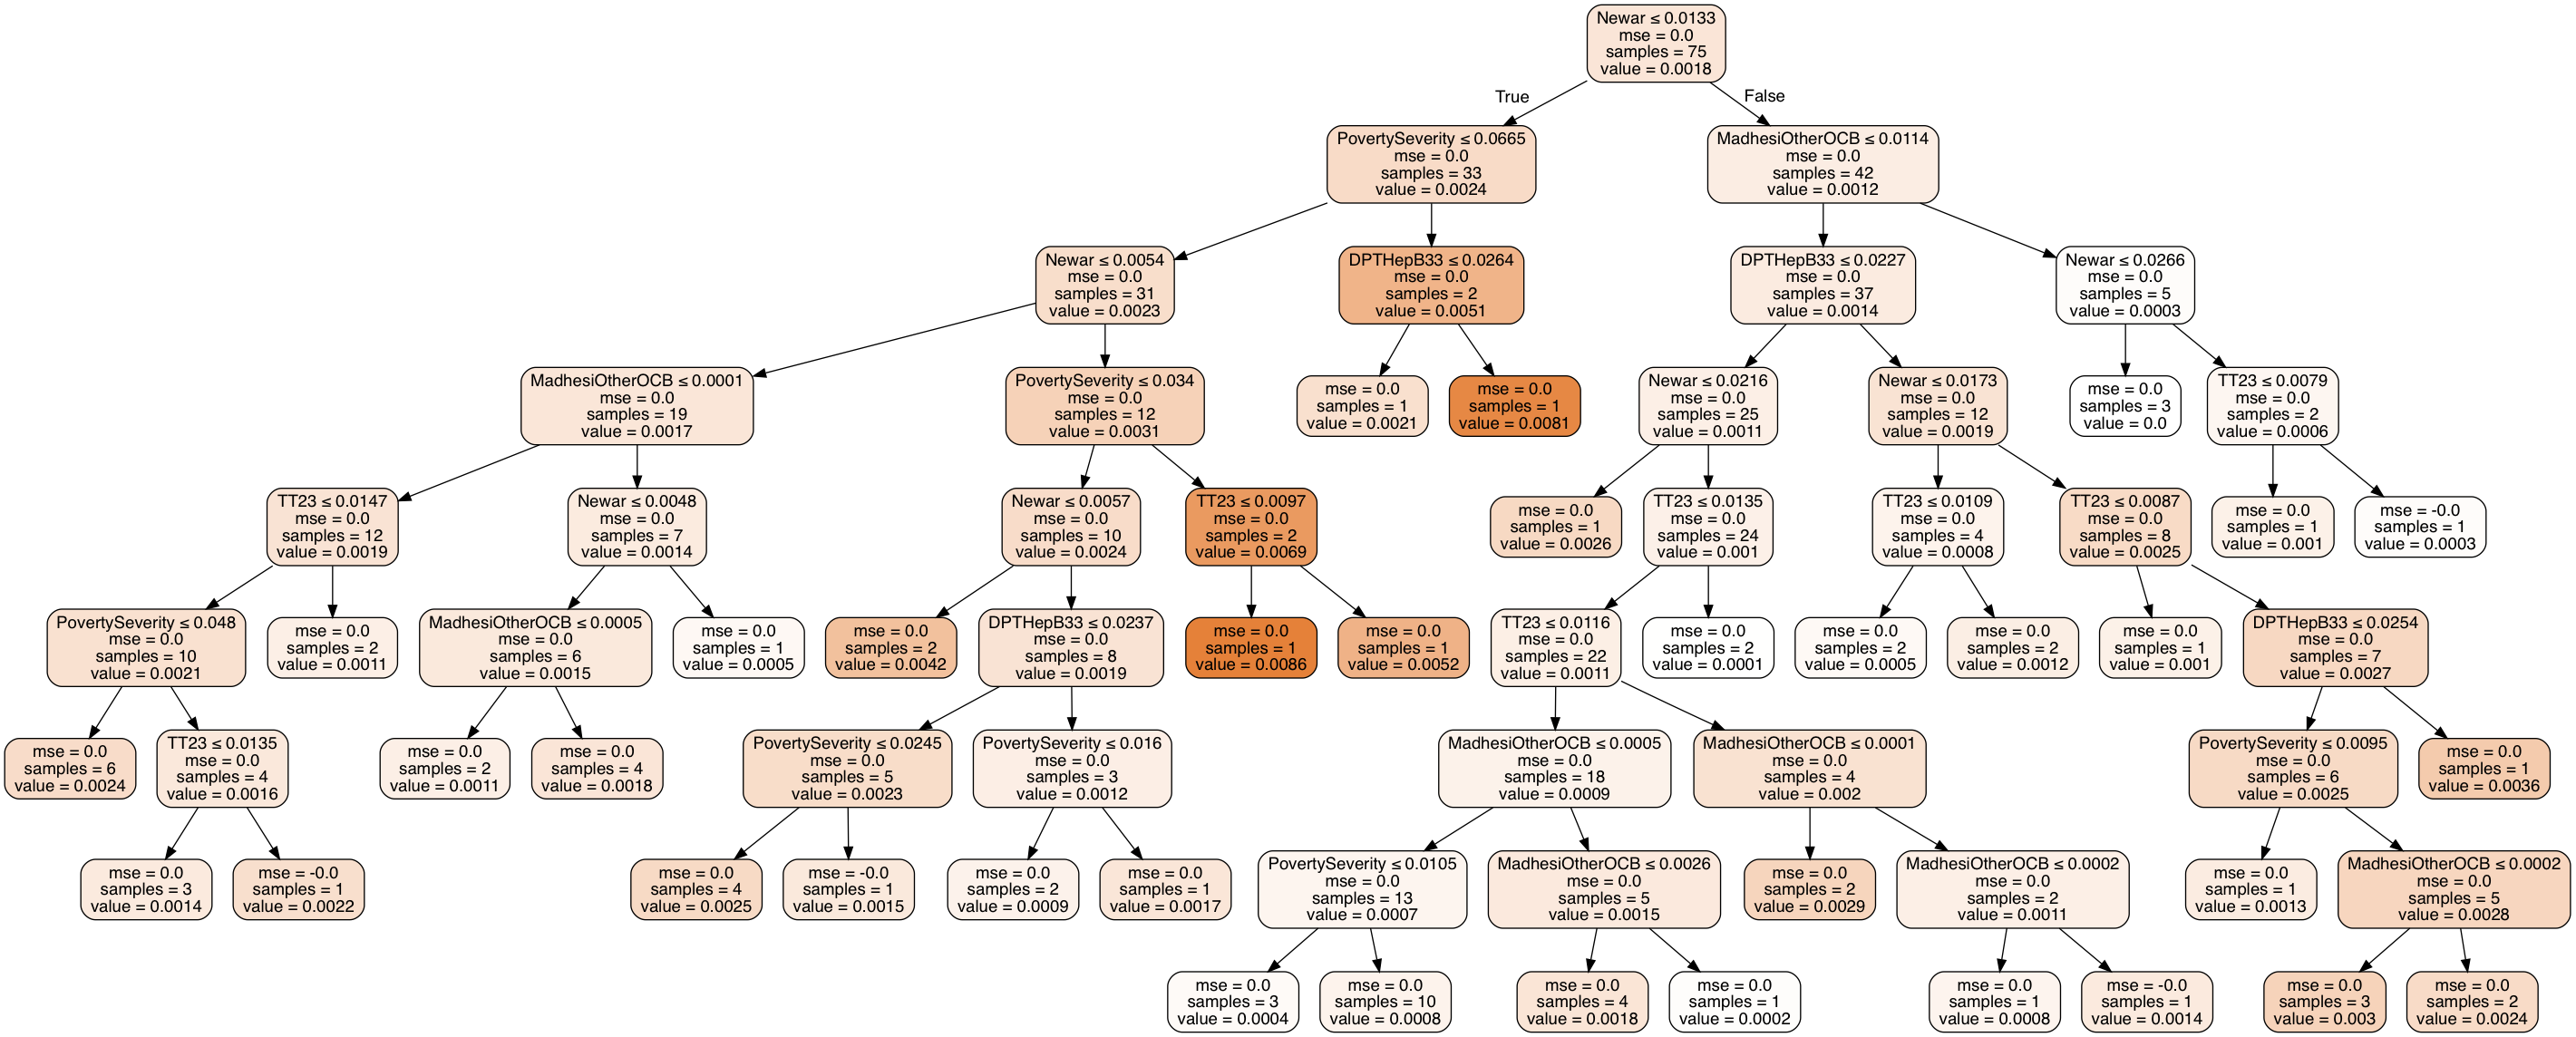

In [19]:
from sklearn.externals.six import StringIO  
from sklearn import tree
from IPython.display import Image  
import pydotplus
dot_data = StringIO()  
tree.export_graphviz(dtr, out_file=dot_data,  
                         feature_names=['MadhesiOtherOCB', 'Newar', 'PovertySeverity', 'DPTHepB33', 'TT23'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

### rfr model for hiv
No parameter tuning

In [20]:
rfr = RandomForestRegressor(random_state=100,oob_score=True)
rfr.fit(hiv2.iloc[:,1:41], hiv2['HIVAIDS'])
print rfr.score(hiv2.iloc[:,1:41], hiv2['HIVAIDS'])
print rfr.oob_score_

0.796524090728
-0.212406588271


In [21]:
estimates = pd.DataFrame()
estimates['District'] = [elem for elem in hiv2.columns[1:41]]
estimates['sig'] = rfr.feature_importances_
estimates.sort_values(by='sig',ascending=False)

,District,sig
21,HPI,0.589243
30,Measles911months3,0.100000
20,Deprivationineconomicprovisioning,0.100000
14,TaraiJanajati,0.002845
16,PovertyGap,0.002825
17,PovertyIncidence,0.002810
22,Children5yearsmalnourished,0.002278
37,SanitationCoverage,0.000000
27,DPTHepB33,0.000000
23,Withoutsafewater,0.000000


In [22]:
mse = pd.DataFrame()
mse['district'] = hiv2['District']
mse['actual'] = hiv2['HIVAIDS']
mse['pred'] = rfr.oob_prediction_
mse['error'] = np.abs(mse['actual']-mse['pred'])
mse.sort_values(by='error')

,district,actual,pred,error
42,Mustang,0.000000,0.000000,0.000000e+00
29,Kalikot,0.000037,0.000036,9.092935e-08
9,Bhaktapur,0.000033,0.000034,1.341164e-06
49,Parbat,0.000034,0.000032,1.793894e-06
68,Syangja,0.000042,0.000038,3.582990e-06
28,Kailali,0.000037,0.000033,4.052615e-06
37,Mahottari,0.000032,0.000037,5.339469e-06
40,Morang,0.000022,0.000030,8.054369e-06
43,Myagdi,0.000026,0.000037,1.027285e-05
2,Baglung,0.000026,0.000037,1.054736e-05


Parameter tuning

In [23]:
#https://www.analyticsvidhya.com/blog/2015/06/tuning-random-forest-model/
model = RandomForestRegressor()
vals = {'n_estimators':[1, 5, 9],'max_features':[.3, .4, .5], 'min_samples_leaf':[10, 15, 20], \
       'n_jobs':[-1], 'oob_score':[True], 'random_state':[1, 2, 3]}
grid = GridSearchCV(estimator=model, param_grid=vals)
grid.fit(hiv2.iloc[:,1:41], hiv2['HIVAIDS'])

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'oob_score': [True], 'n_jobs': [-1], 'min_samples_leaf': [10, 15, 20], 'n_estimators': [1, 5, 9], 'random_state': [1, 2, 3], 'max_features': [0.3, 0.4, 0.5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [24]:
print grid.best_estimator_.n_estimators
print grid.best_estimator_.max_features
print grid.best_estimator_.min_samples_leaf
print grid.best_estimator_.random_state
print grid.best_score_

5
0.4
15
2
-1.56875318198


In [25]:
best = grid.best_estimator_
best.fit(hiv2.iloc[:,1:41], hiv2['HIVAIDS'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.4, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=15, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=-1,
           oob_score=True, random_state=2, verbose=0, warm_start=False)

In [26]:
print best.score(hiv2.iloc[:,1:41], hiv2['HIVAIDS'])
print best.oob_score_

0.0351268556923
-0.0115503212967


In [27]:
estimates = pd.DataFrame()
estimates['vars'] = [elem for elem in hiv2.iloc[:,1:41].columns]
estimates['sig'] = best.feature_importances_
estimates.sort_values(by='sig',ascending=False)

,vars,sig
31,Polio13,0.2
30,Measles911months3,0.2
23,Withoutsafewater,0.2
9,MtnHillJanajatiB,0.2
24,BCG3,0.0
25,DPTHepB13,0.0
26,DPTHepB23,0.0
27,DPTHepB33,0.0
28,JapeneseEncephalitis3,0.0
29,Measles12233,0.0


In [28]:
mse = pd.DataFrame()
mse['district'] = hiv2['District']
mse['actual'] = hiv2['HIVAIDS']
mse['pred'] = best.oob_prediction_
mse['error'] = np.abs(mse['actual']-mse['pred'])
mse.sort_values(by='error')

,district,actual,pred,error
1,Arghakhanchi,0.000000,0.000000,0.000000
16,Dhankuta,0.000000,0.000000,0.000000
70,Taplejung,0.000000,0.000000,0.000000
57,Rupandehi,0.000000,0.000000,0.000000
27,Jumla,0.000000,0.000000,0.000000
52,Ramechhap,0.000025,0.000021,0.000004
40,Morang,0.000022,0.000026,0.000004
28,Kailali,0.000037,0.000033,0.000005
54,Rautahat,0.000019,0.000025,0.000006
71,Terhathum,0.000020,0.000026,0.000007


### decision tree for hiv with significant random forest vars

In [29]:
sig = estimates[estimates['sig'] >=.2]
sig

,vars,sig
9,MtnHillJanajatiB,0.2
23,Withoutsafewater,0.2
30,Measles911months3,0.2
31,Polio13,0.2


In [30]:
dtr = DecisionTreeRegressor()
dtr.fit(hiv2.loc[:,['MtnHillJanajatiB', 'Withoutsafewater', 'Measles911months3', 'Polio13']], hiv2['HIVAIDS'])

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [31]:
dtr.score(hiv2.loc[:,['MtnHillJanajatiB', 'Withoutsafewater', 'Measles911months3', 'Polio13']], hiv2['HIVAIDS'])

0.98577092861989879

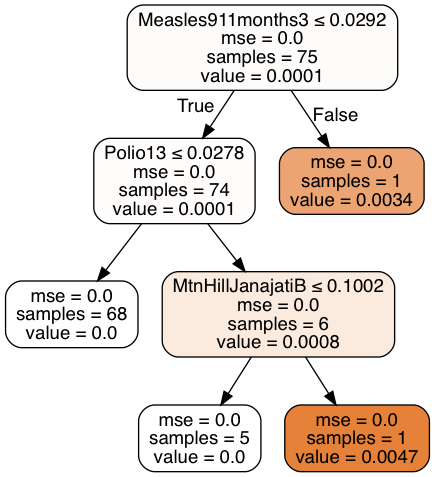

In [32]:
from sklearn.externals.six import StringIO  
from sklearn import tree
from IPython.display import Image  
import pydotplus
dot_data = StringIO()  
tree.export_graphviz(dtr, out_file=dot_data,  
                         feature_names=['MtnHillJanajatiB', 'Withoutsafewater', 'Measles911months3', 'Polio13'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  